In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read data from csv file into pandas dataframe 
data_f = pd.read_csv( "ECA_data.csv")
data_f.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [3]:
# check for nan values in data
data_f.isna()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18766,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18767,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# for question 1 of ECA
# categorical and numeric variables in this data
data_f.columns

Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')

In [5]:
# for question 3 of ECA
# importing required library for graphs
import seaborn as sns

[Text(0.5, 1.0, 'Education Counts for each level')]

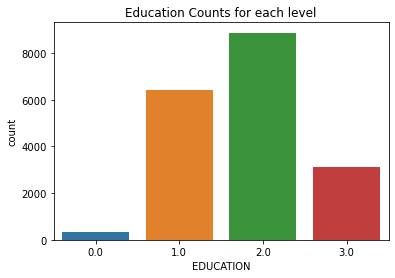

In [6]:
sns.countplot(x=data_f['EDUCATION']).set(title="Education Counts for each level")

[Text(0.5, 1.0, 'Distribution of Balance wrt B1')]

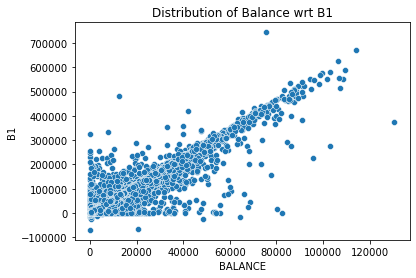

In [7]:
sns.scatterplot(data=data_f, x="BALANCE", y="B1").set(title = 'Distribution of Balance wrt B1')

[Text(0.5, 1.0, 'MARITAL Counts')]

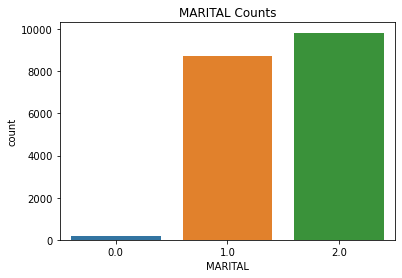

In [8]:
sns.countplot(x=data_f['MARITAL']).set(title="MARITAL Counts")

[Text(0.5, 1.0, 'Limit vs B1'), Text(0.5, 0, 'Limit'), Text(0, 0.5, 'B1')]

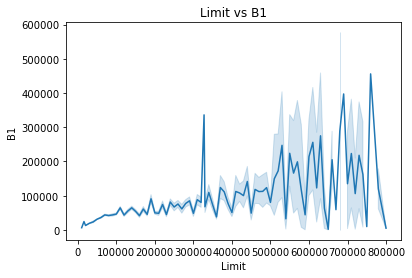

In [9]:
sns.lineplot(x=data_f['LIMIT'], y = data_f['B1']).set(title="Limit vs B1" , xlabel = 'Limit' , ylabel = 'B1')

[Text(0.5, 1.0, 'INCOME vs B1'), Text(0.5, 0, 'INCOME'), Text(0, 0.5, 'B1')]

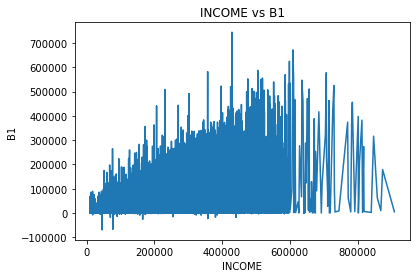

In [10]:
# showing approx normal distribution between Income and target variable B1
sns.lineplot(x=data_f['INCOME'], y = data_f['B1']).set(title="INCOME vs B1" , xlabel = 'INCOME' , ylabel = 'B1')

In [11]:
# for question 2 of ECA
# data pre-processing: removing nan values
data_f = data_f.dropna()

In [12]:
# data pre-procssing: removing special characters
data_f["R3"] = (data_f["R3"].map(lambda x: x.strip("$").replace(",", ""))).astype('int')

In [13]:
# data pre-processing: removing column with name ID
data_f = data_f.drop(["ID"], axis=1)

In [14]:
# data pre-processing: normalization
data_f = (data_f - data_f.min())/ (data_f.max() - data_f.min())

In [15]:
# for question 4 of ECA
# specifying target and features values
target = data_f["B1"]
features = data_f.drop(["B1"], axis=1)

In [16]:
# splitting data into Training and Test set
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split( features, target, test_size=0.30)

In [17]:
# importing libraries required for linear regression modeling 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
# linear regression model instance
reg_model = LinearRegression()
reg_model.fit(X_train_d, y_train_d)

LinearRegression()

In [19]:
# predicting result
prediction_t = reg_model.predict(X_test_d)

In [20]:
# score of the model testing
print('R2_score ', r2_score(y_test_d, prediction_t))
print('mean_square_error : ', mean_squared_error(y_test_d, prediction_t) )

R2_score  0.9446689707288329
mean_square_error :  0.0004285180919230472


In [21]:
# for question 5 of ECA
# building equation of the model by getting coeficients value
equation_val = []
for i in range(len(reg_model.coef_ )):
    equation_val.append(str( np.around(reg_model.coef_ [i], decimals = 4)) + " " +str(features.columns[i]))
print("equation = ", " + ".join(equation_val))

equation =  0.0107 LIMIT + 0.4308 BALANCE + -0.0108 INCOME + 0.0002 RATING + -0.0002 GENDER + -0.0001 EDUCATION + 0.0001 MARITAL + -0.001 AGE + -0.0112 S1 + 0.0189 S2 + -0.0041 S3 + -0.0001 S4 + -0.001 S5 + 0.6864 B2 + -0.0111 B3 + -0.0768 B4 + 0.0606 B5 + -0.455 R1 + 0.1535 R2 + 0.0454 R3 + -0.0303 R4 + -0.0065 R5
